In [3]:
!pip install matplotlib
!pip install pydub

Processing folder: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P
Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P\300_AUDIO.wav


C:\Users\herna\AppData\Local\Temp\ipykernel_3424\1874497397.py:56: WavFileWarning: Reached EOF prematurely; finished at 20752044 bytes, expected 166016044 bytes from header.
  sampling_rate, analog_audio_signal = wavfile.read(file_path)
d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\Recreating paper\Preprocessing\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


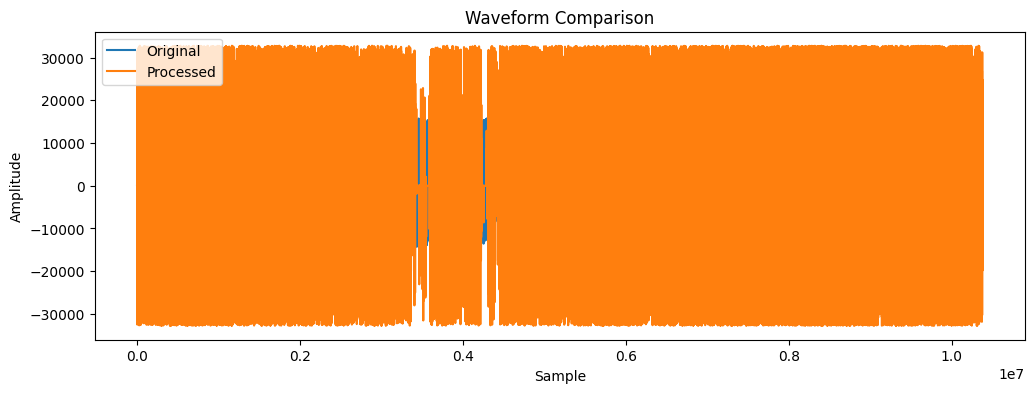

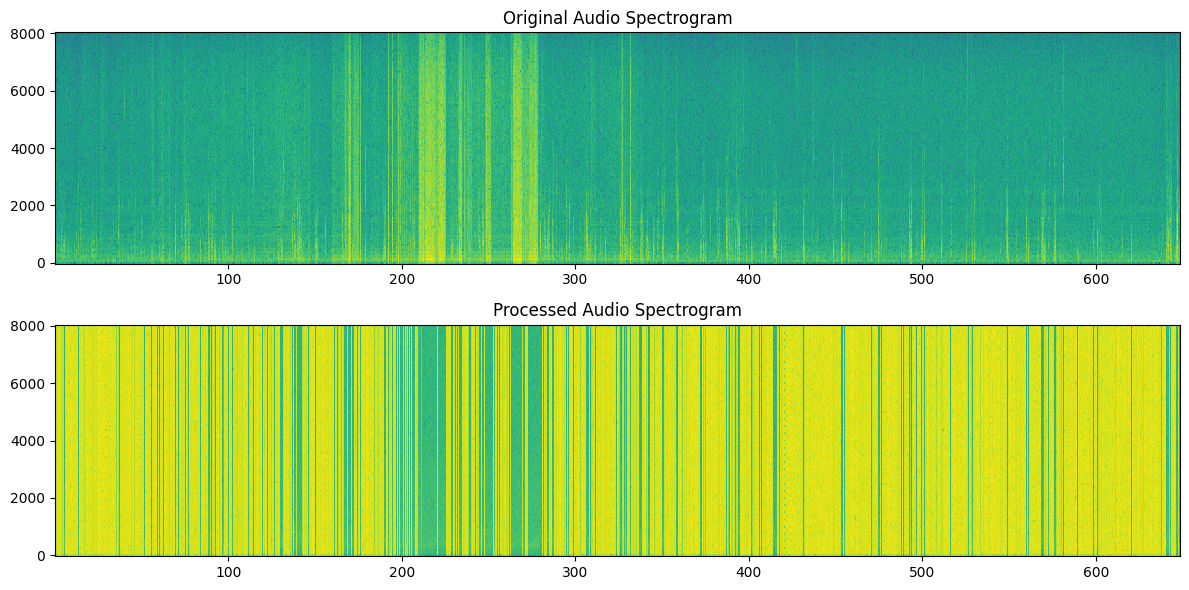

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P\output.wav


ValueError: File format b'\x05\x00\t\x00' not understood. Only 'RIFF' and 'RIFX' supported.

In [4]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter, spectrogram
import matplotlib.pyplot as plt

def amplify_and_gain_control(signal, amplification_factor):
    amplified_signal = signal * amplification_factor
    return amplified_signal

def pre_filtering(signal, sampling_rate):
    low_cutoff = 300.0
    high_cutoff = 3400.0
    nyquist = 0.5 * sampling_rate
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(N=6, Wn=[low, high], btype='band')
    
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

def analog_to_digital_conversion(signal, quantization_bits):
    normalized_signal = np.clip(signal, -1.0, 1.0)
    quantized_signal = np.round((normalized_signal + 1.0) / 2.0 * (2**quantization_bits - 1))
    return quantized_signal.astype(np.int16)

def encoding(digital_signal):
    # Additional encoding if needed
    encoded_signal = digital_signal
    return encoded_signal

# Specify the path to the main folder containing subfolders with .wav files
main_folder_path = "d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data"

# Default values
amplification_factor = 2.0
quantization_bits = 16

# Iterate through each folder in the main folder
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")
        
        # Iterate through each file in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            # Check if it's a .wav file
            if file_name.lower().endswith('.wav'):
                print(f"Processing file: {file_path}")
                
                # Load .wav file
                sampling_rate, analog_audio_signal = wavfile.read(file_path)

                # Step 1: Amplification and Gain Control
                amplified_signal = amplify_and_gain_control(analog_audio_signal, amplification_factor)

                # Step 2: Pre-Filtering
                filtered_signal = pre_filtering(amplified_signal, sampling_rate)

                # Step 3: Analog to Digital Conversion
                digital_signal = analog_to_digital_conversion(filtered_signal, quantization_bits)

                # Step 4: Coding/Encoding
                encoded_signal = encoding(digital_signal)

                # Visualize the waveform
                plt.figure(figsize=(12, 4))
                plt.plot(analog_audio_signal, label='Original')
                plt.plot(encoded_signal, label='Processed')
                plt.title('Waveform Comparison')
                plt.xlabel('Sample')
                plt.ylabel('Amplitude')
                plt.legend()
                plt.show()

                # Visualize the spectrogram
                frequencies, times, Sxx_original = spectrogram(analog_audio_signal, fs=sampling_rate)
                frequencies, times, Sxx_processed = spectrogram(encoded_signal, fs=sampling_rate)

                plt.figure(figsize=(12, 6))

                plt.subplot(2, 1, 1)
                plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_original), shading='auto')
                plt.title('Original Audio Spectrogram')

                plt.subplot(2, 1, 2)
                plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_processed), shading='auto')
                plt.title('Processed Audio Spectrogram')

                plt.tight_layout()
                plt.show()


In [ ]:
from scipy.signal import spectrogram

# Compute and plot the spectrograms
frequencies, times, Sxx_original = spectrogram(analog_audio_signal, fs=sampling_rate)
frequencies, times, Sxx_processed = spectrogram(encoded_signal, fs=sampling_rate)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_original), shading='auto')
plt.title('Original Audio Spectrogram')

plt.subplot(2, 1, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_processed), shading='auto')
plt.title('Processed Audio Spectrogram')

plt.tight_layout()
plt.show()


In [ ]:
from pydub import AudioSegment
from pydub.playback import play

# Convert NumPy array to AudioSegment for playback
original_audio_segment = AudioSegment(samples=analog_audio_signal, sample_width=2, frame_rate=sampling_rate, channels=1)
processed_audio_segment = AudioSegment(samples=encoded_signal, sample_width=2, frame_rate=sampling_rate, channels=1)

# Play the audio segments
play(original_audio_segment)
play(processed_audio_segment)


Processing folder: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P
Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\300_P\300_AUDIO.wav


C:\Users\herna\AppData\Local\Temp\ipykernel_33788\2058233808.py:56: WavFileWarning: Reached EOF prematurely; finished at 20752044 bytes, expected 166016044 bytes from header.
  sampling_rate, analog_audio_signal = wavfile.read(file_path)


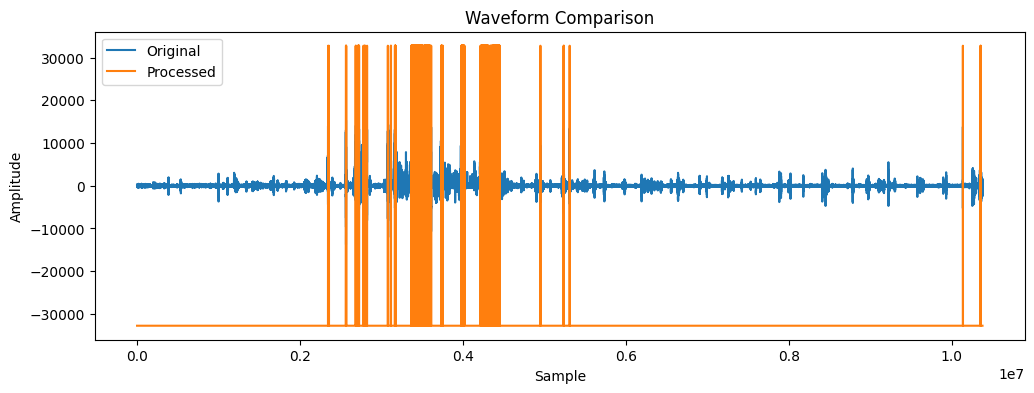

C:\Users\herna\AppData\Local\Temp\ipykernel_33788\2058233808.py:91: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_processed), shading='auto')


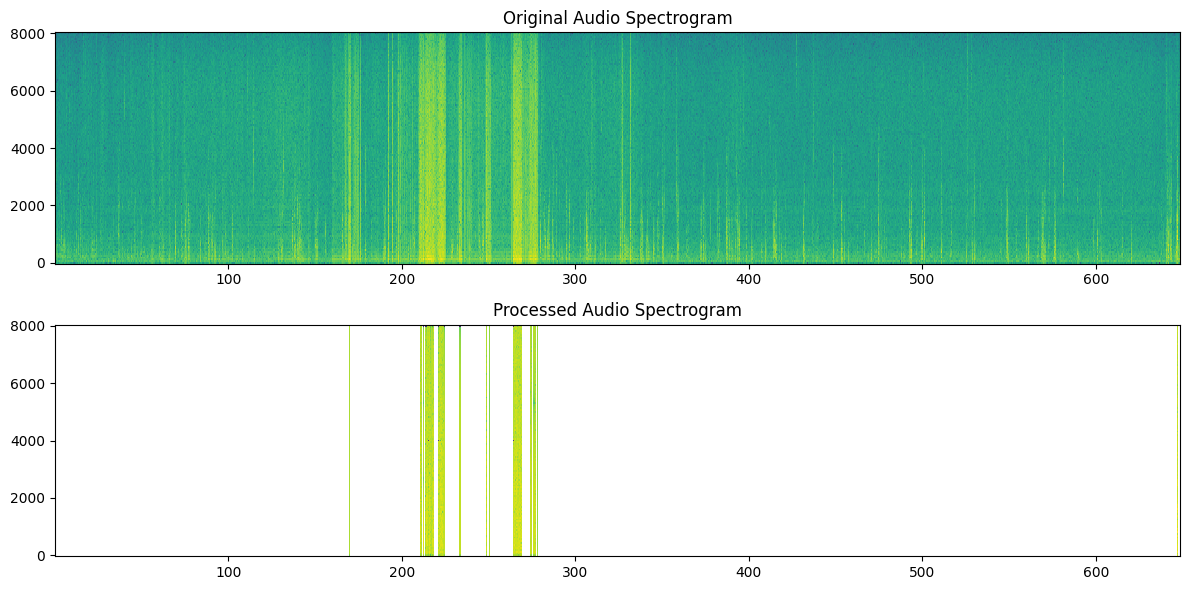

Processing folder: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P
Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P\301_AUDIO.wav


C:\Users\herna\AppData\Local\Temp\ipykernel_33788\2058233808.py:56: WavFileWarning: Reached EOF prematurely; finished at 26364844 bytes, expected 210918444 bytes from header.
  sampling_rate, analog_audio_signal = wavfile.read(file_path)


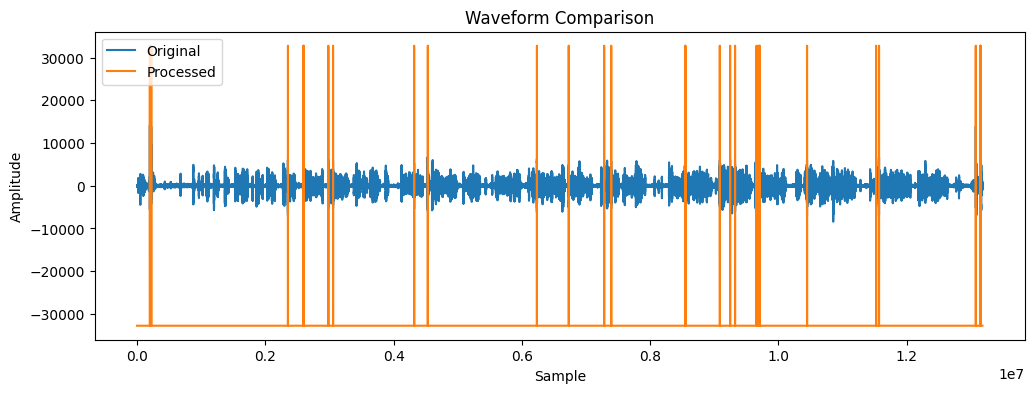

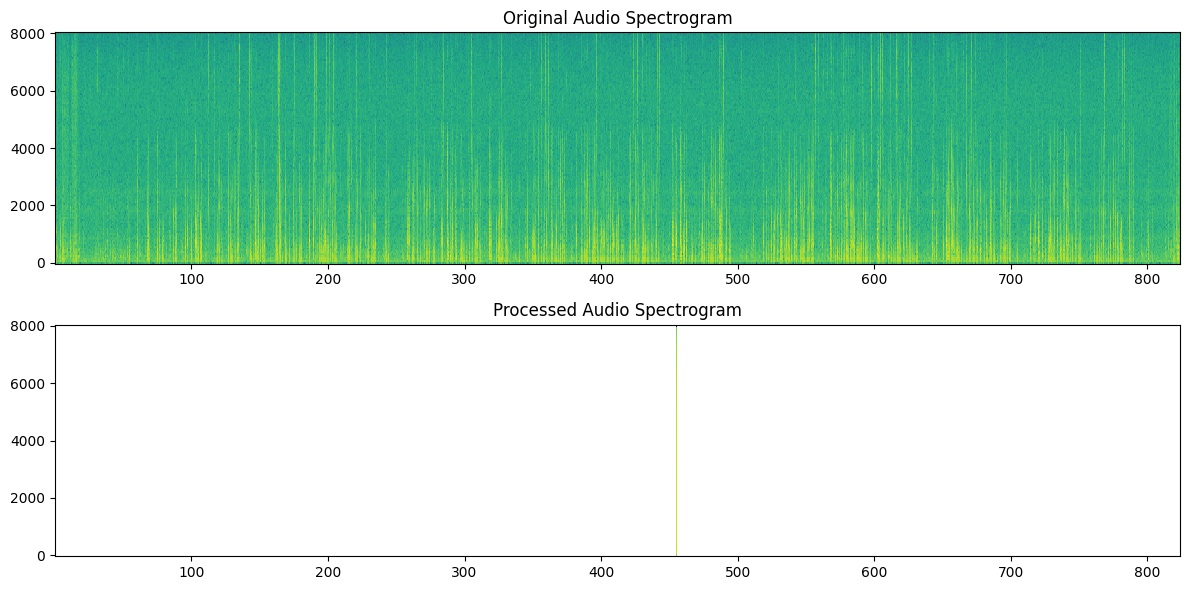

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P\processed_301_AUDIO.wav


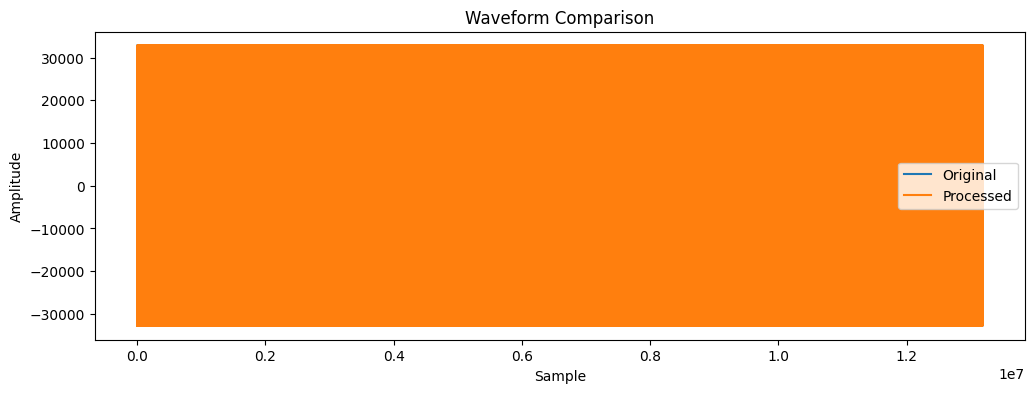

C:\Users\herna\AppData\Local\Temp\ipykernel_33788\2058233808.py:87: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_original), shading='auto')


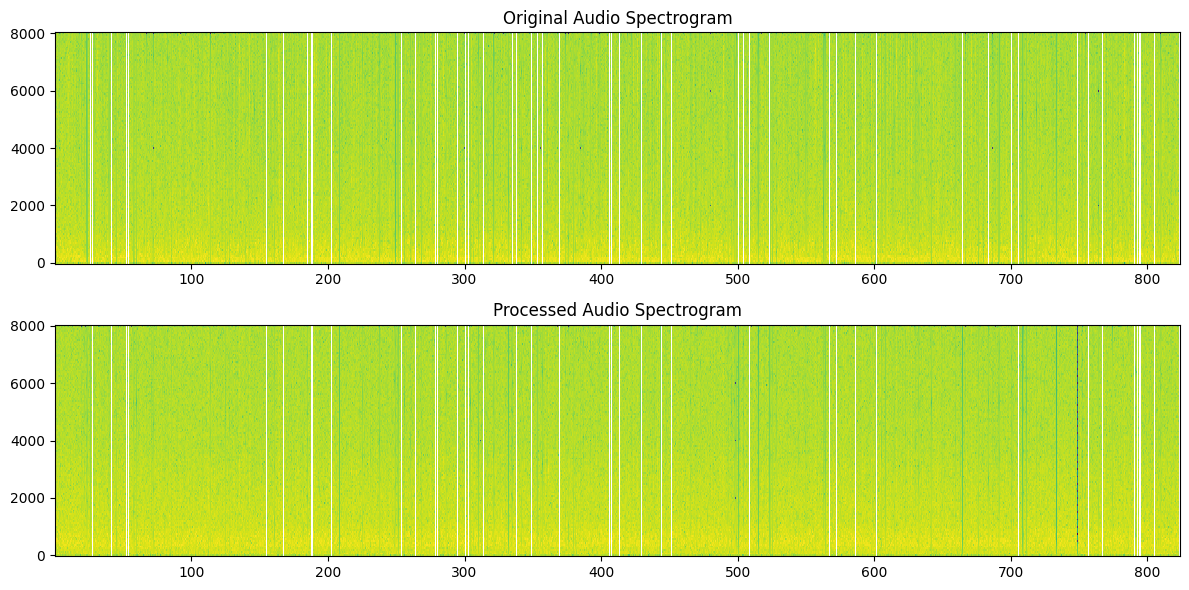

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P\processed_processed_301_AUDIO.wav


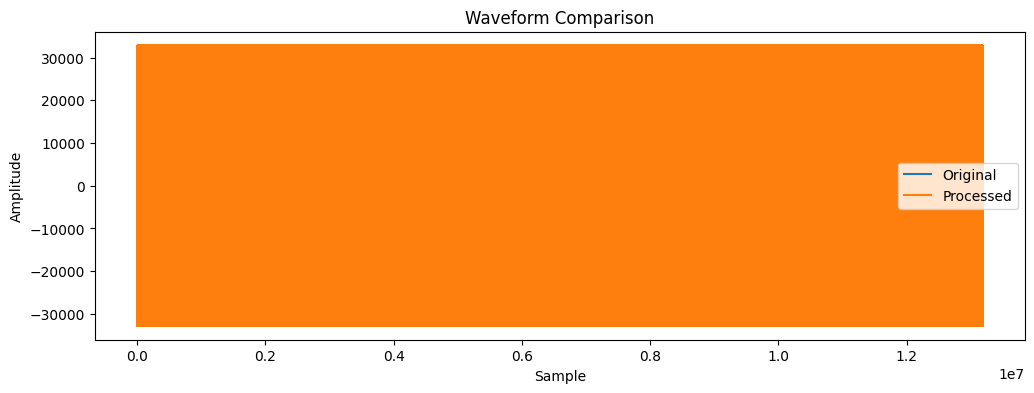

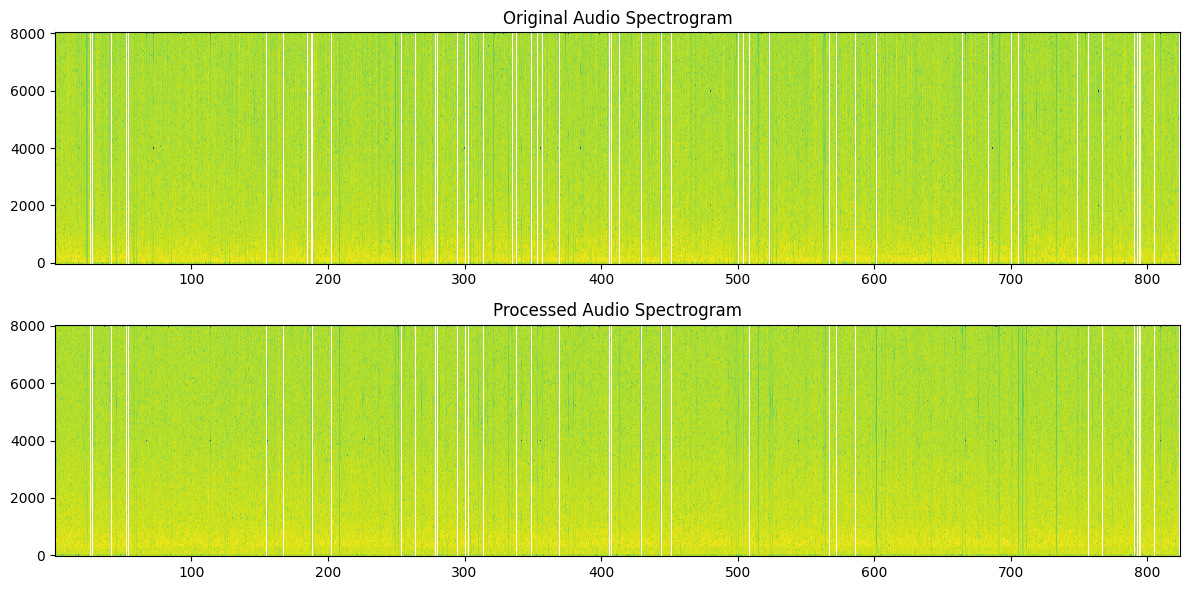

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P\processed_processed_processed_301_AUDIO.wav


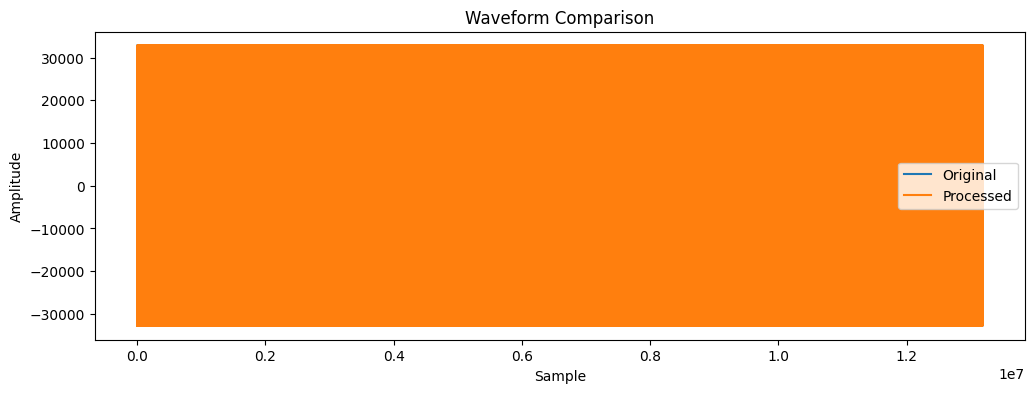

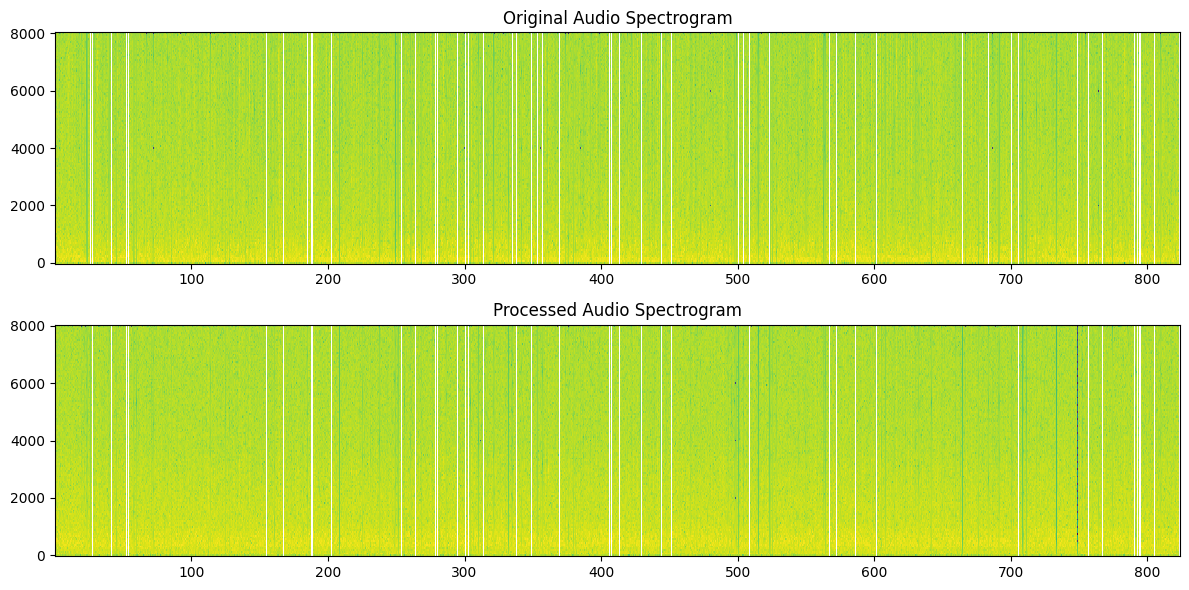

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P\processed_processed_processed_processed_301_AUDIO.wav


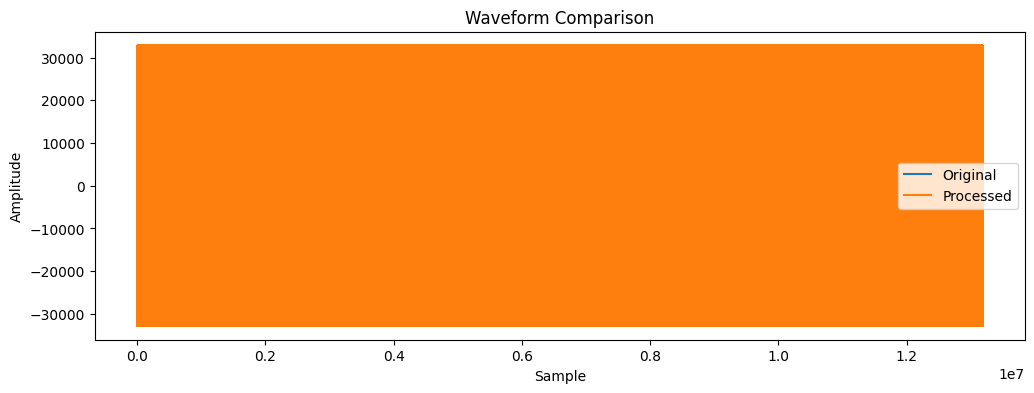

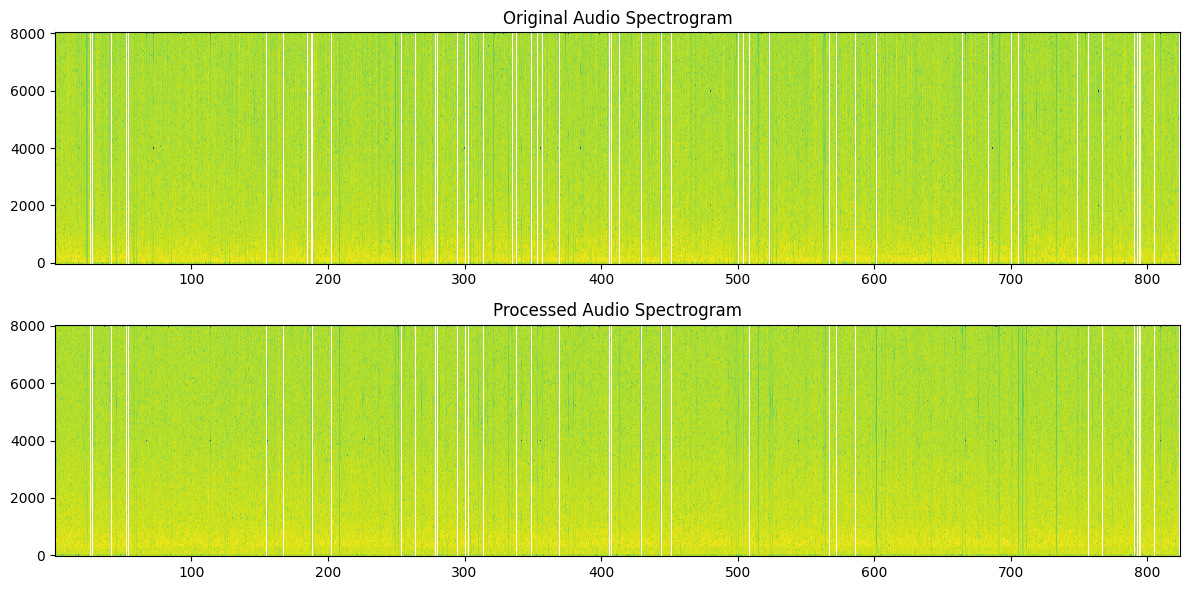

Processing file: d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data\301_P\processed_processed_processed_processed_processed_301_AUDIO.wav


UnboundLocalError: local variable 'fs' referenced before assignment

In [ ]:
import os
import numpy as np
from scipy.io import wavfile
from scipy.signal import butter, lfilter, spectrogram
import matplotlib.pyplot as plt

def amplify_and_gain_control(signal, amplification_factor):
    amplified_signal = signal * amplification_factor
    return amplified_signal

def pre_filtering(signal, sampling_rate):
    low_cutoff = 300.0
    high_cutoff = 3400.0
    nyquist = 0.5 * sampling_rate
    low = low_cutoff / nyquist
    high = high_cutoff / nyquist
    b, a = butter(N=6, Wn=[low, high], btype='band')
    
    filtered_signal = lfilter(b, a, signal)
    return filtered_signal

def analog_to_digital_conversion(signal, quantization_bits):
    normalized_signal = np.clip(signal, -1.0, 1.0)
    quantized_signal = np.round((normalized_signal + 1.0) / 2.0 * (2**quantization_bits - 1))
    return quantized_signal.astype(np.int16)

def encoding(digital_signal):
    # Additional encoding if needed
    encoded_signal = digital_signal
    return encoded_signal

# Specify the path to the main folder containing subfolders with .wav files
main_folder_path = "d:\Sistema\Escritorio\Escritorio\Tesis\DAIC-WOZ\data"

# Default values
amplification_factor = 0.00000000000000000001
quantization_bits = 16

# Iterate through each folder in the main folder
for folder_name in os.listdir(main_folder_path):
    folder_path = os.path.join(main_folder_path, folder_name)
    
    # Check if it's a directory
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder_path}")
        
        # Iterate through each file in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            
            # Check if it's a .wav file
            if file_name.lower().endswith('.wav'):
                print(f"Processing file: {file_path}")
                
                # Load .wav file
                sampling_rate, analog_audio_signal = wavfile.read(file_path)

                # Step 1: Amplification and Gain Control
                amplified_signal = amplify_and_gain_control(analog_audio_signal, amplification_factor)

                # Step 2: Pre-Filtering
                filtered_signal = pre_filtering(amplified_signal, sampling_rate)

                # Step 3: Analog to Digital Conversion
                digital_signal = analog_to_digital_conversion(filtered_signal, quantization_bits)

                # Step 4: Coding/Encoding
                encoded_signal = encoding(digital_signal)

                # Visualize the waveform
                plt.figure(figsize=(12, 4))
                plt.plot(analog_audio_signal, label='Original')
                plt.plot(encoded_signal, label='Processed')
                plt.title('Waveform Comparison')
                plt.xlabel('Sample')
                plt.ylabel('Amplitude')
                plt.legend()
                plt.show()

                # Visualize the spectrogram
                frequencies, times, Sxx_original = spectrogram(analog_audio_signal, fs=sampling_rate)
                frequencies, times, Sxx_processed = spectrogram(encoded_signal, fs=sampling_rate)

                plt.figure(figsize=(12, 6))

                plt.subplot(2, 1, 1)
                plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_original), shading='auto')
                plt.title('Original Audio Spectrogram')

                plt.subplot(2, 1, 2)
                plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx_processed), shading='auto')
                plt.title('Processed Audio Spectrogram')

                plt.tight_layout()
                plt.show()
